In [1]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
df_salario = pd.read_csv('./datasets/data.csv')

In [3]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
#Copiar DF para DF_EDA
df_salario_eda = df_salario.copy()

In [5]:
df_salario_bucketing = df_salario.copy()

### EDA

In [6]:
#visulizar dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
#detectar valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:
# Medidas estatisticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

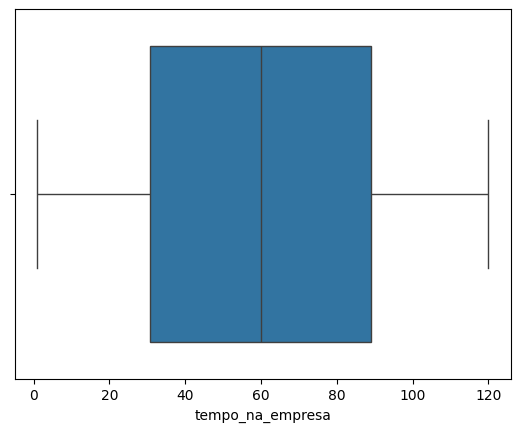

In [9]:
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

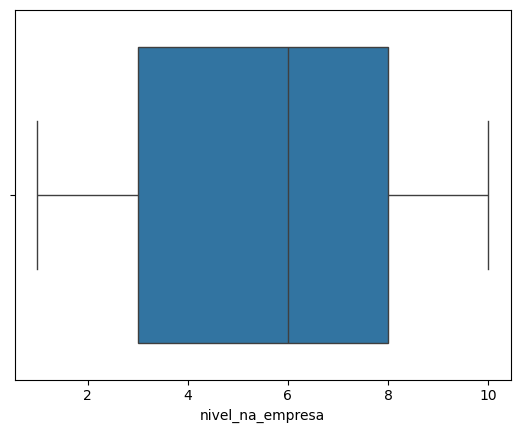

In [10]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

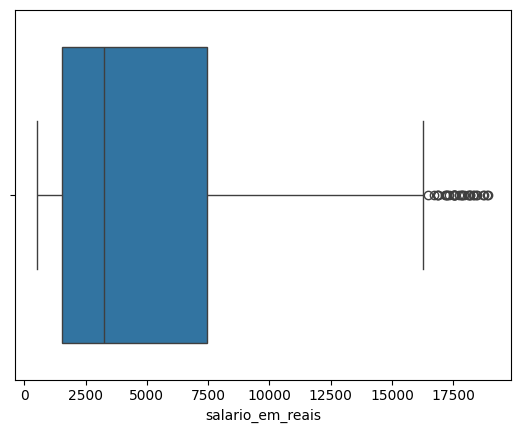

In [11]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

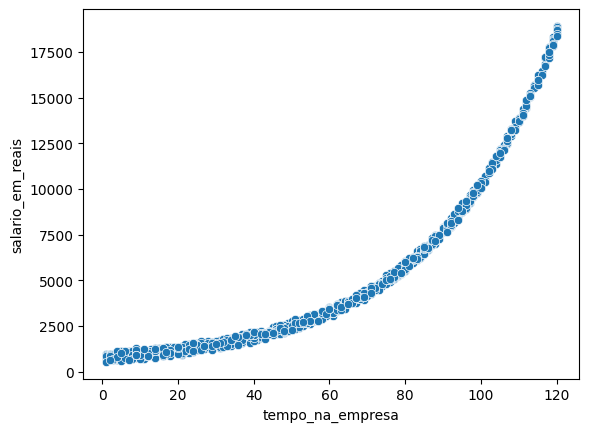

In [12]:
# cruzando variaveis numericas com salario em reais
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

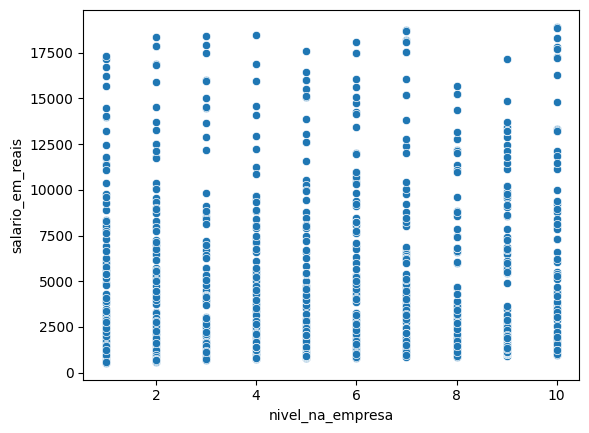

In [13]:
# cruzando variaveis numericas com salario em reais
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

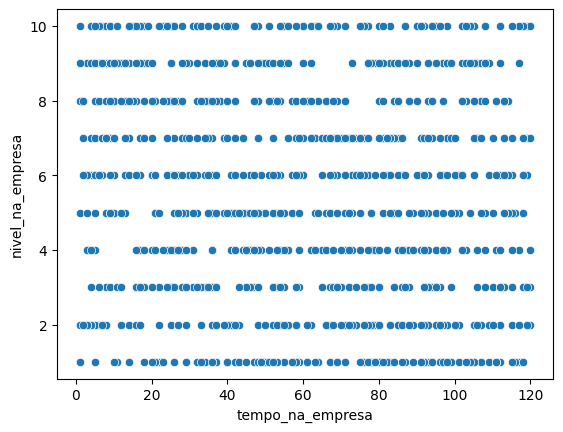

In [14]:
# cruzando variaveis numericas com salario em reais
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='nivel_na_empresa')

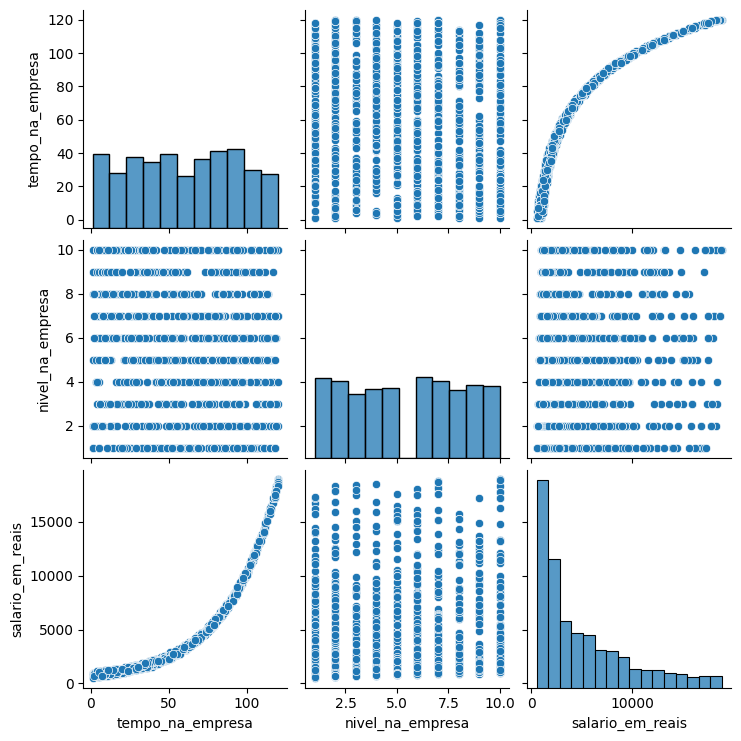

In [15]:
#histogramas da variaveis
sns.pairplot(df_salario_eda)

<Axes: >

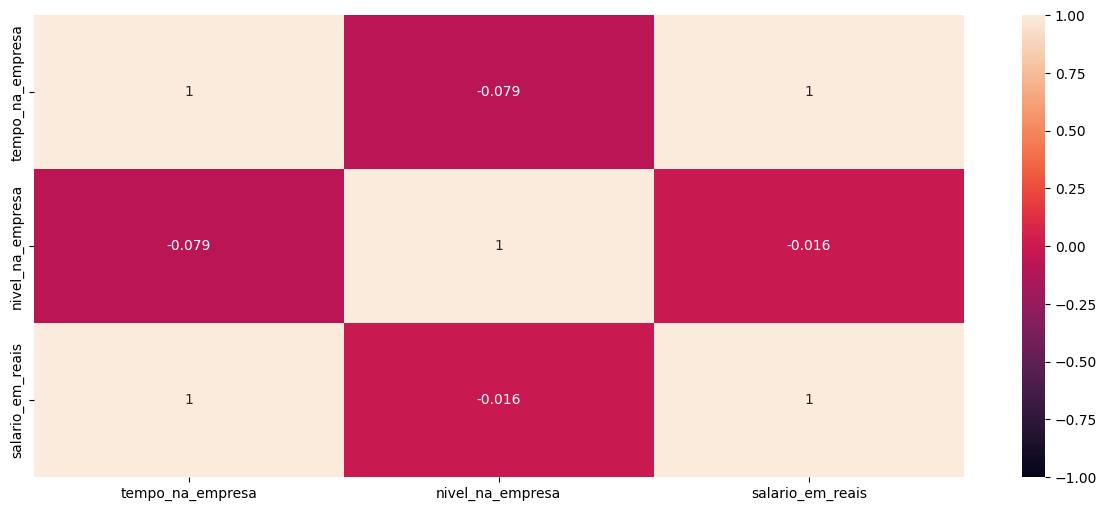

In [16]:
#mapa de calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)


<Axes: >

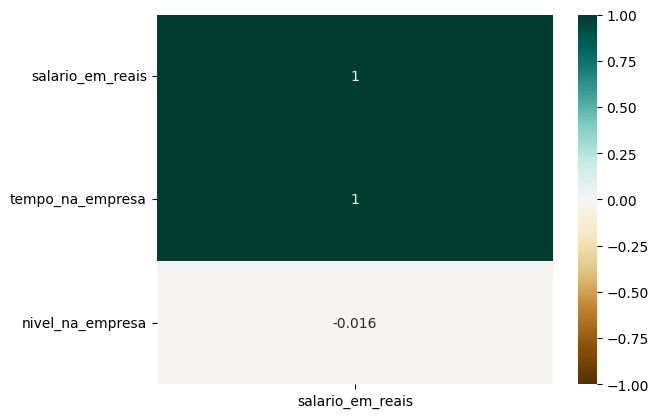

In [17]:
#formato de ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values
            (by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [18]:
# bucketing tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing
                                              ['tempo_na_empresa'], bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)

In [19]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

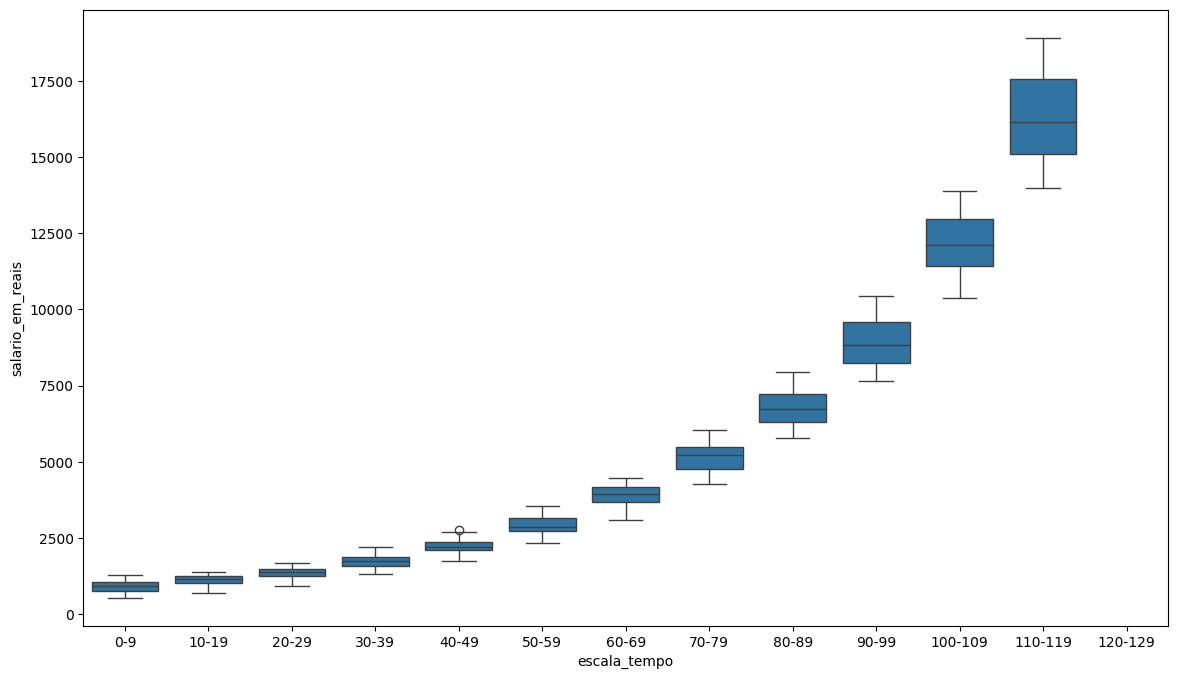

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinar modelo linear

In [21]:
#importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [22]:
#Criar o dataset de treino e teste
X= df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [23]:
#split usando kfold com 5 pastas 
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [24]:
kf

KFold(n_splits=5, random_state=51, shuffle=True)

In [25]:
# Bloco para treinamento do modelo
#pipeline
#padronização de variaveis numericas
#Nomes das colunas
colunas_numericas = ['tempo_na_empresa','nivel_na_empresa']
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)
#criando o pipeline principal
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])



In [26]:
# armazenar RMSE Treino e teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

#armazenar R2 score de teste
r2score_fold_test = []

#armazenar residuos
residuos = []

#armazenar predições
y_pred_total = []

for train_index, test_index in kf.split(X): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #treine o modelo no conjunto
    model_regr.fit(X_train, y_train)

    #Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)


    #calcule o RMSE para os conjuntos
    rmse_tr = mean_squared_error(y_train, y_train_pred)
    rmse_te = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(rmse_tr)
    rmse_test = np.sqrt(rmse_te)

    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    #amazenar as metricas
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)


### Analise de metricas do modelo linear

In [27]:
#Métricas
print(f'Rmse treino: { rmse_train_final}')
print(f'Rmse teste: { rmse_test_final}')
print(f'Percentual: {percentual_rmse_final}')
print(f'R2_score teste: { r2score_test_final}')

Rmse treino: 1882.8318426651392
Rmse teste: 1886.4504221336076
Percentual: 0.19218813844503052
R2_score teste: 0.8261178870584761


### Analise de residuos - Modelo Linear


In [29]:
# transformar residuos na escala padrao
# (x-media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

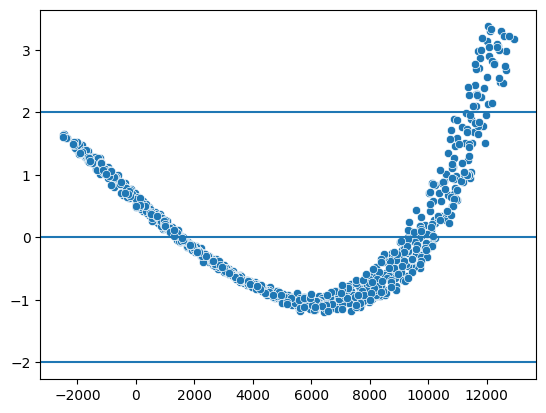

In [31]:
#verificar linearidade dos residuos -2 +2
# homocedasticidade se os valores estao em torno da reta sem nenhuma tendencia de formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

obs.: não tem linearidade e nem homost

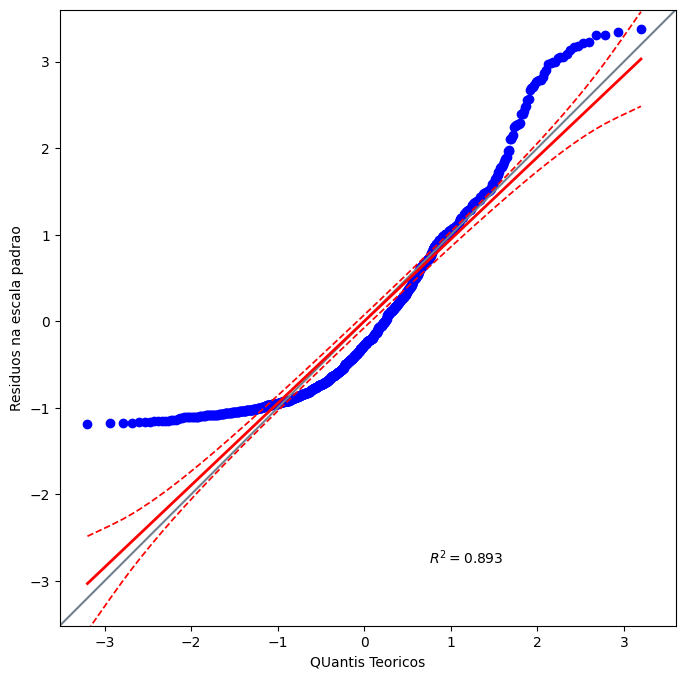

In [32]:
#checar normalidade
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('QUantis Teoricos')
plt.ylabel('Residuos na escala padrao')
plt.show()

In [33]:
# teste de normalidade  - shapiro wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stats_shapiro, p_values_shapiro = shapiro(residuos)
print(f"Estat. Teste {stats_shapiro} e P-value {p_values_shapiro}")

Estat. Teste 0.8919692179652284 e P-value 7.013497918014399e-26


In [37]:
# teste de normalidade  - kolmogorov-smirnov
stats_ks, p_values_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stats_ks} e P-value {p_values_ks}")

Estat. Teste 0.5939999999999955 e P-value 0.0


In [38]:
# teste de normalidade  - lilliefors
stats_ll, p_values_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste {stats_ll} e P-value {p_values_ll}")

Estat. Teste 0.11825983774680093 e P-value 0.0009999999999998899


Não encaixou na regressão linear multipla

### Treinar modelo polinomial

In [ ]:
# Exemplo de criação de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_


array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [42]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [49]:
# Bloco para treinamento do modelo
#graus_polinomial = [1,2,3,4,5,6,7,8,9,10]
graus_polinomial = [4]
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

#split usando kfold com 5 pastas 
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polinomial:
    #pipeline
    #padronização de variaveis numericas
    #Nomes das colunas
    colunas_numericas = ['tempo_na_empresa','nivel_na_empresa']
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    #Criar um columnTransformer    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )
    
    #Criar features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)
    
    
    #criando o pipeline principal
    model_poly = Pipeline(steps=[('preprocessor', preprocessor),
                                ('poly_feature', poly_feat),
                                ('regressor', LinearRegression())])
    # armazenar RMSE Treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    #armazenar R2 score de teste
    r2score_fold_test = []

    #armazenar residuos
    residuos = []

    #armazenar predições
    y_pred_total = []

    for train_index, test_index in kf.split(X): 
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #treine o modelo no conjunto
        model_poly.fit(X_train, y_train)

        #Faça predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)


        #calcule o RMSE para os conjuntos
        rmse_tr = mean_squared_error(y_train, y_train_pred)
        rmse_te = mean_squared_error(y_test, y_test_pred)

        rmse_train = np.sqrt(rmse_tr)
        rmse_test = np.sqrt(rmse_te)

        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        #amazenar as metricas
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


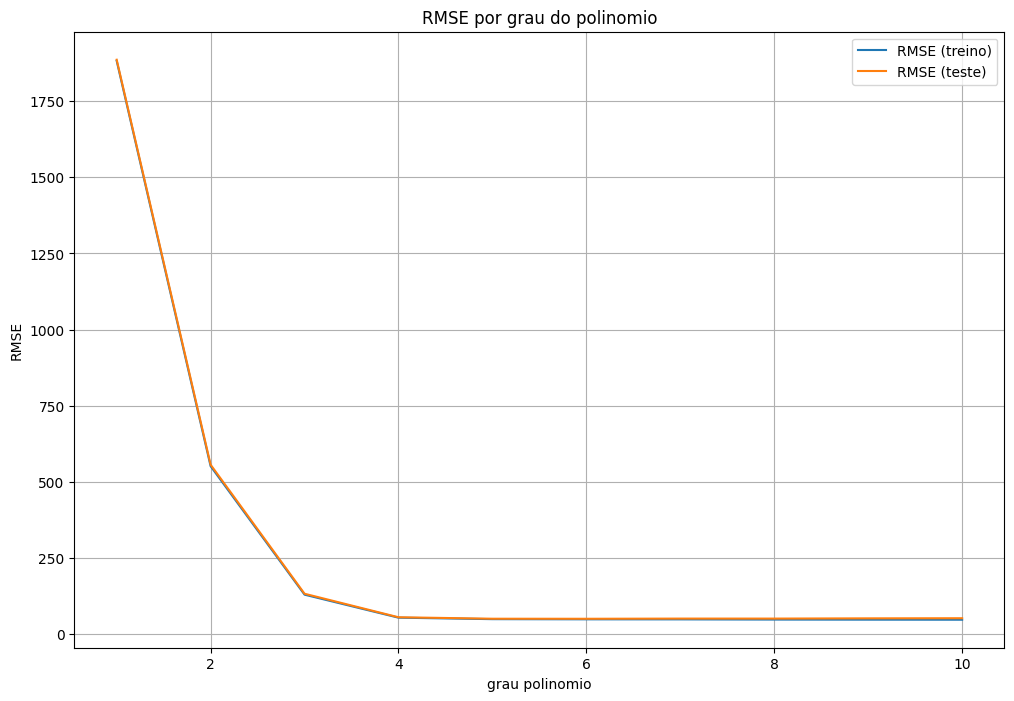

In [47]:
# plotar grafioc para comparar rmse por grau de polinomio
plt.figure(figsize=(12,8))
plt.plot(graus_polinomial, rmse_train_values, label='RMSE (treino)')
plt.plot(graus_polinomial, rmse_test_values, label='RMSE (teste)')
plt.xlabel('grau polinomio')
plt.ylabel('RMSE')
plt.title('RMSE por grau do polinomio')
plt.legend()
plt.grid(True)
plt.show()

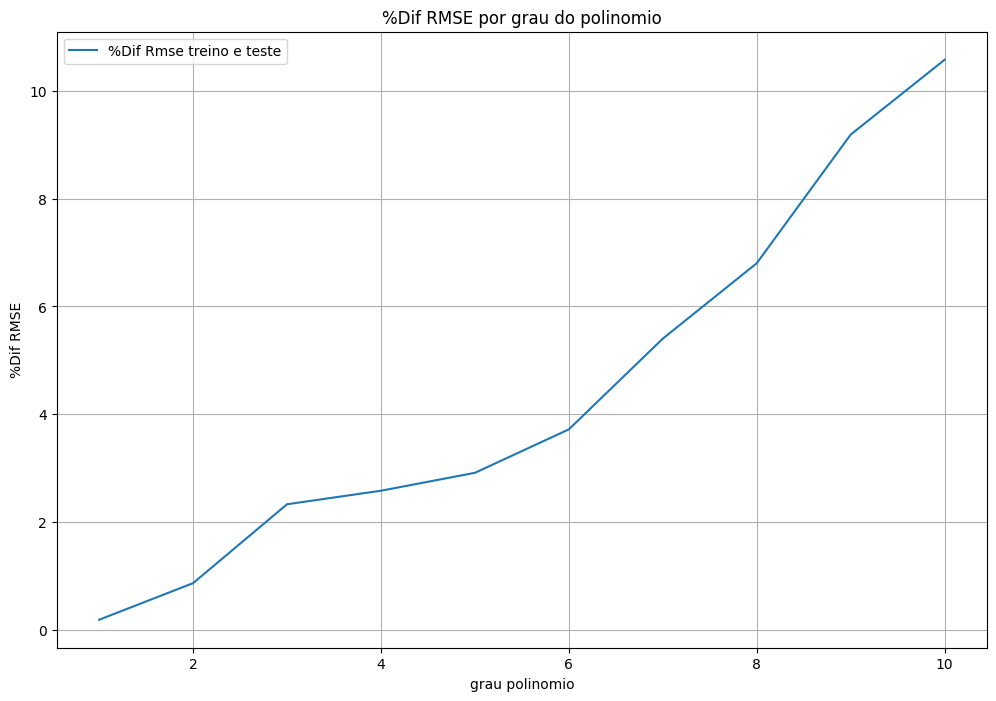

In [48]:
# comparar %dif RMSE treino e teste
plt.figure(figsize=(12,8))
plt.plot(graus_polinomial, percentual_rmse_values, label='%Dif Rmse treino e teste')
plt.xlabel('grau polinomio')
plt.ylabel('%Dif RMSE')
plt.title('%Dif RMSE por grau do polinomio')
plt.legend()
plt.grid(True)
plt.show()

### Analise de metricas do modelo polinomial

In [50]:
#Métricas
print(f'Rmse treino: { rmse_train_final}')
print(f'Rmse teste: { rmse_test_final}')
print(f'Percentual: {percentual_rmse_final}')
print(f'R2_score teste: { r2score_test_final}')

Rmse treino: 53.32698559565159
Rmse teste: 54.70504352796327
Percentual: 2.5841661907551114
R2_score teste: 0.9998524123039415


### Analise de residuos - Modelo Polinomial


In [51]:
# transformar residuos na escala padrao
# (x-media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

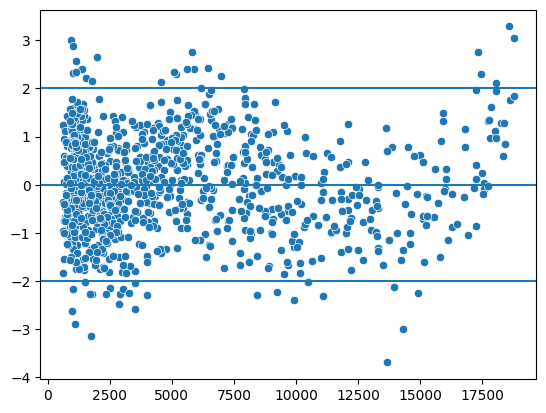

In [52]:
#verificar linearidade dos residuos -2 +2
# homocedasticidade se os valores estao em torno da reta sem nenhuma tendencia de formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

obs.: não tem linearidade e nem homost

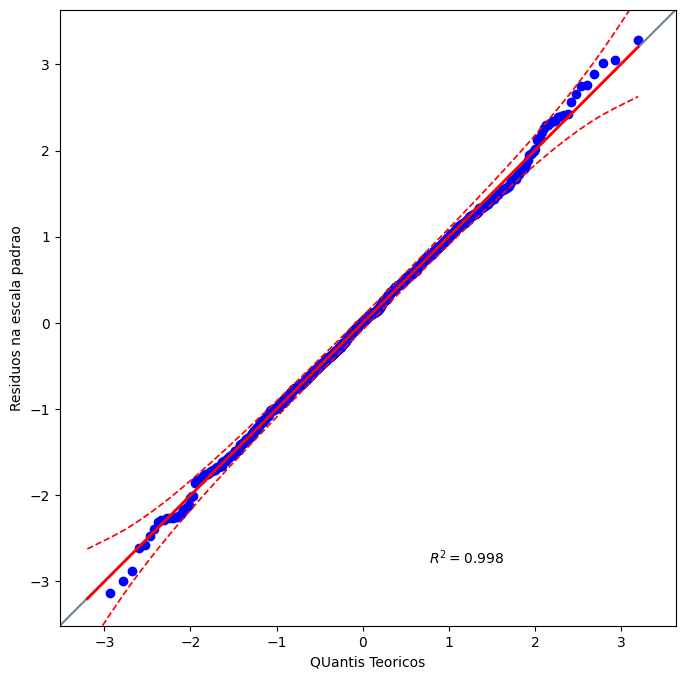

In [53]:
#checar normalidade
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('QUantis Teoricos')
plt.ylabel('Residuos na escala padrao')
plt.show()

In [55]:
# teste de normalidade  - shapiro wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stats_shapiro, p_values_shapiro = shapiro(residuos)
print(f"Estat. Teste {stats_shapiro} e P-value {p_values_shapiro}")

Estat. Teste 0.9986951372205334 e P-value 0.6852797159667293


In [56]:
# teste de normalidade  - kolmogorov-smirnov
stats_ks, p_values_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stats_ks} e P-value {p_values_ks}")

Estat. Teste 0.48237446499535763 e P-value 1.220246010522094e-214


In [57]:
# teste de normalidade  - lilliefors
stats_ll, p_values_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste {stats_ll} e P-value {p_values_ll}")

Estat. Teste 0.013637346894967206 e P-value 0.9566270022048831


### Realizar predições individuais

In [60]:
input_features = {
    'tempo_na_empresa': 72,
    'nivel_na_empresa': 5
}

pred_df = pd.DataFrame(input_features, index=[1])

In [61]:
model_poly.predict(pred_df)

array([4575.82161046])

In [62]:
import joblib

In [63]:
joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']